In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(15,8)})

In [3]:
working_dir = # complete path 
money_cols = [f"money_q{i}" for i in range(0, 44)]

In [4]:
results_storage = {
    "BestReturnLastQuarter_500_experiments": {
        "name": "Last Quarter Best Return",
        "file_name": r"BestReturnLastQuarterInvestor_results 12.03.2021 16-20-53.csv"
    },
    
    "BestReturnLastQuarter_10k_experiments": {
        "name": "Last Quarter Best Return",
        "file_name": r"BestReturnLastQuarterInvestor_results 13.03.2021 18-00-55.csv"
    },
    "ExpertAdvice": {
        "name": "Expert Advice",
        "file_name": r"ExpertAdviceInvestor_results 17.03.2021 22-18-16.csv"
    },
    "LowestFees": {
        "name": "Lowest Fees",
        "file_name": r"LowestFeeInvestor_results 17.03.2021 21-58-30.csv"
    },
    "LargestFund": {
        "name": "Largest Fund",
        "file_name": r"LargestFundInvestor_results 17.03.2021 22-43-56.csv"
    },
    "BestReturnFiveYears": {
        "name": "Best Return over the last five years",
        "file_name": r"BestReturnLastFiveYearsInvestor_results 20.03.2021 12-49-33.csv"
    },
    "BestReturnThreeYears": {
        "name": "Best Return over the last three years",
        "file_name": r"BestReturnLastThreeYearsInvestor_results 19.03.2021 18-52-29.csv"
    },
    "BestReturnLastYear": {
        "name": "Best Return over the year",
        "file_name": r"BestReturnLastYearInvestor_results 19.03.2021 18-33-38.csv"
    },
    "BestReturnLastQuarter": {
        "name": "Best Return in the previous quarter",
        "file_name": r"BestReturnLastQuarterInvestor_results 19.03.2021 18-07-02.csv"
    },
    "RealEstate": {
        "name": "Sectorial Agent: Real Estate",
        "file_name": r"RealEstateInvestor_results 19.03.2021 17-20-28.csv"
    },    
    "Technology": {
        "name": "Sectorial Agent: Technology",
        "file_name": r"TechnologyInvestor_results 19.03.2021 17-43-19.csv"
    },
    "BestInvestor": {
        "name": "Pseudo Investor: Best Case",
        "file_name": r"BestInvestor_results 19.03.2021 16-32-13.csv"
    },
    "WorstInvestor": {
        "name": "Pseudo Investor: Worst Case",
        "file_name": r"WorstInvestor_results 19.03.2021 16-54-49.csv"
    },
    "RandomInvestor": {
        "name": "Pseudo Investor: Monkey (choosing random fund)",
        "file_name": r"MonkeyInvestor_results 01.04.2021 15-19-13.csv"
    },
}

### Single Heuristic Analysis

In [5]:
def show_quantiles_graph(results_df, heuristic_name):
    partial_quantiles_df = results_df[money_cols].quantile(q=[0, 0.05, 0.95, 1]).transpose()
    partial_quantiles_df.rename(columns={0:"min", 1: "max", 0.05:"quantile 0.05", 0.95:"quantile 0.95"}, inplace=True)
    mean_df = results_df[money_cols].mean().rename("mean")
    quantiles_df = pd.concat([partial_quantiles_df, mean_df], axis=1)
    quantiles_df.rename(index={f"money_q{i}":i for i in range(0, 44)}, inplace=True)
    quantiles_df = quantiles_df[["mean", "min", "max", "quantile 0.05", "quantile 0.95"]]
    sns.lineplot(data=quantiles_df).set_title(f"Results for '{heuristic_name}' Heuristic")

    
def final_results_histogram(results_df, heuristic_name):
    final_res = results_df["money_q43"].rename("final_money")
    sns.histplot(final_res, stat="probability", bins=30).set_title(f"Distribution of Final Results for '{heuristic_name}' Heuristic")

    
def bleed_rates_for_heuristic(results_df, heuristic_name):
    from collections import defaultdict 
    from itertools import groupby
    
    bleed_df = results_df.diff(1, axis=1)
    biggest_single_bleed = bleed_df.min().min()
    
    # calculate longest bleed
    longest_bleed = 0 
    for single_experiment in bleed_df.to_numpy():
        counter = defaultdict(list) 
        for key, val in groupby(single_experiment, lambda ele: "plus" if ele >= 0 else "minus"): 
            counter[key].append(len(list(val))) 
        curr_experiment_bleed = max(counter['minus'])
        longest_bleed = max(longest_bleed, curr_experiment_bleed)
    
    results_dict = {
        'biggest_bleed': biggest_single_bleed,
        'longest_bleed': longest_bleed,
    }
    
    return results_dict


def get_heuristic_stats(results_df, heuristic_name):
    heuristic_stats = bleed_rates_for_heuristic(results_df[money_cols], heuristic_name)
    heuristic_stats["average_gain"] = results_df["money_q43"].mean()
    heuristic_stats["maximum_gain"] = results_df["money_q43"].max()
    heuristic_stats["minimum_gain"] = results_df["money_q43"].min()
    print(f"Stats for {heuristic_name}")
    print(heuristic_stats)

In [6]:
def full_report_for_signel_heuristic(curr_heuristic):
    df = pd.read_csv(working_dir + curr_heuristic["file_name"])
    get_heuristic_stats(df, curr_heuristic["name"])
    show_quantiles_graph(df, curr_heuristic["name"])
    plt.show()
    plt.clf()
    final_results_histogram(df, curr_heuristic["name"])
    plt.show()
    plt.clf()

Stats for Lowest Fees
{'biggest_bleed': -167048.32504568688, 'longest_bleed': 6, 'average_gain': 266187.33953217976, 'maximum_gain': 809449.1021748562, 'minimum_gain': 33352.094345378166}


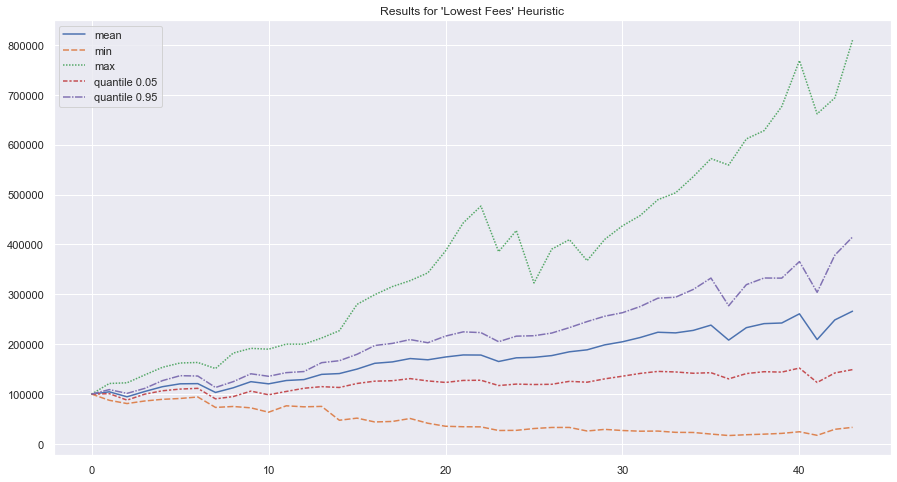

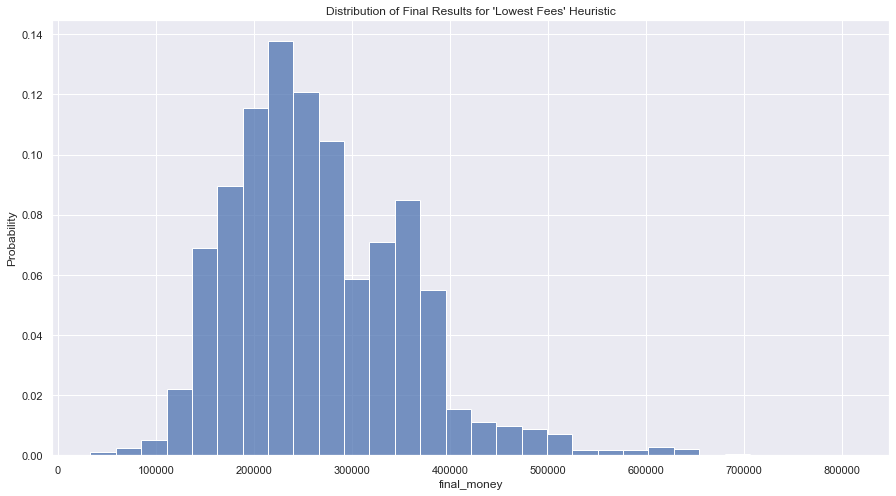

<Figure size 1080x576 with 0 Axes>

In [37]:
# Lowest Fees
full_report_for_signel_heuristic(results_storage["LowestFees"])

Stats for Expert Advice
{'biggest_bleed': -173898.34641996218, 'longest_bleed': 9, 'average_gain': 277513.34476891503, 'maximum_gain': 984275.4522852794, 'minimum_gain': 43454.474924039714}


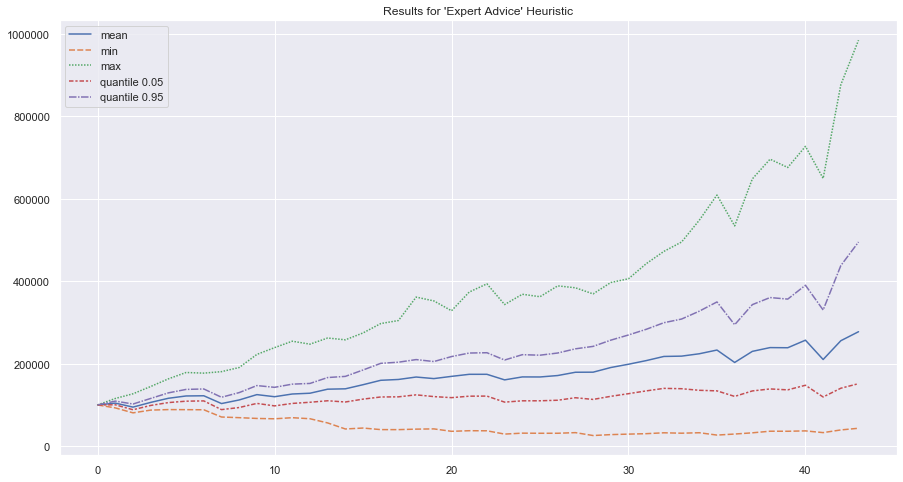

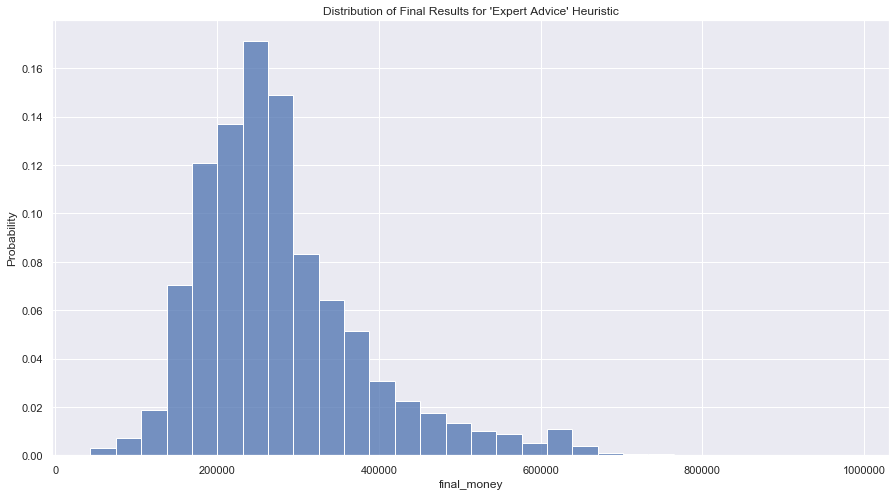

<Figure size 1080x576 with 0 Axes>

In [38]:
# Expert Advice
full_report_for_signel_heuristic(results_storage["ExpertAdvice"])

Stats for Largest Fund
{'biggest_bleed': -183431.10012085747, 'longest_bleed': 7, 'average_gain': 273463.7113707775, 'maximum_gain': 803964.0688051793, 'minimum_gain': 66859.89076246244}


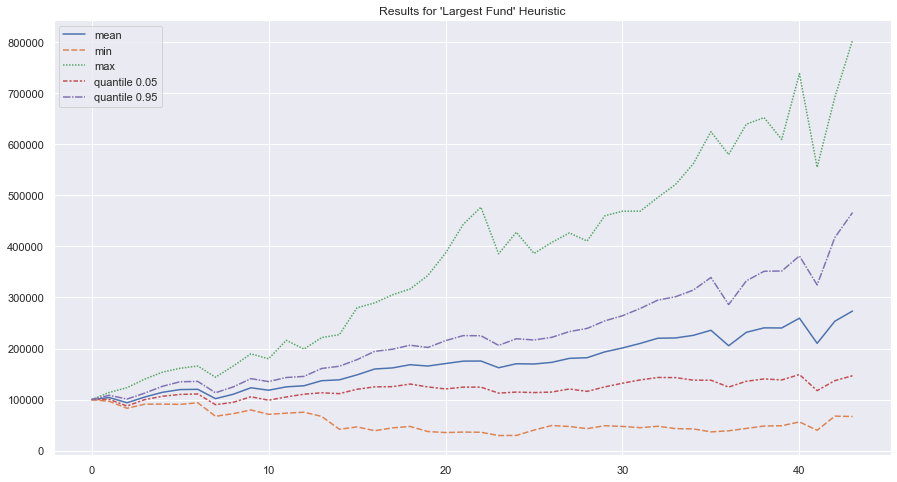

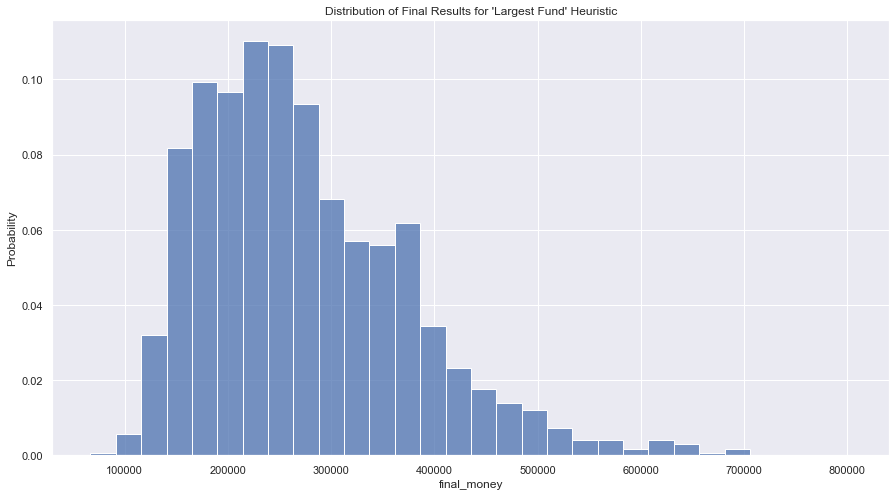

<Figure size 1080x576 with 0 Axes>

In [39]:
# Largeset Fund
full_report_for_signel_heuristic(results_storage["LargestFund"])

Stats for Pseudo Investor: Best Case
{'biggest_bleed': -1527891.2952311318, 'longest_bleed': 3, 'average_gain': 2473928.383620956, 'maximum_gain': 24993067.94509104, 'minimum_gain': 637826.1006549908}


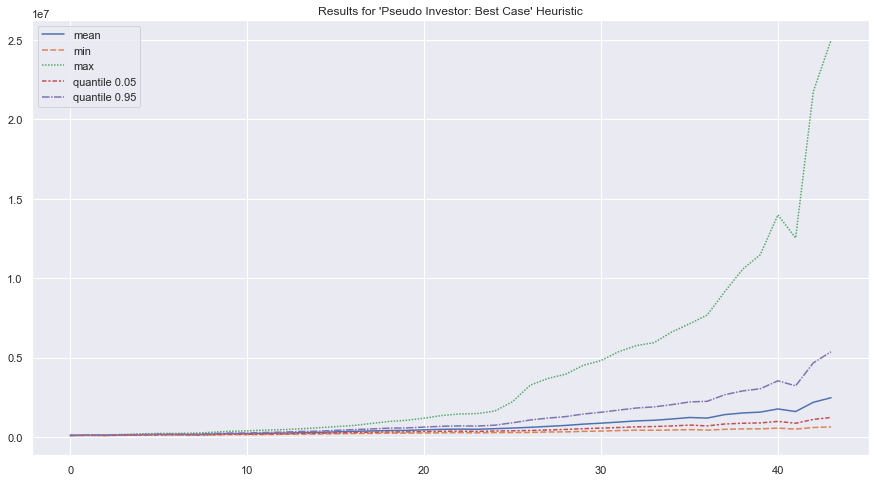

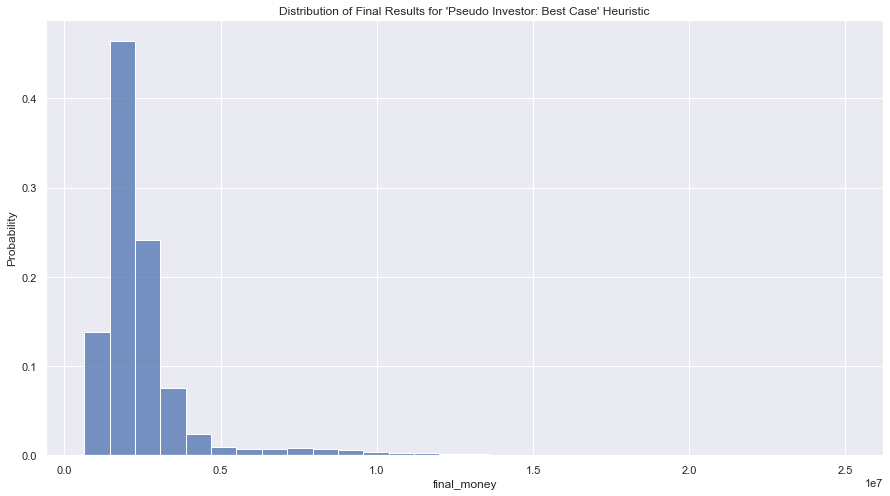

<Figure size 1080x576 with 0 Axes>

In [41]:
# Best Investor
full_report_for_signel_heuristic(results_storage["BestInvestor"])

Stats for Pseudo Investor: Worst Case
{'biggest_bleed': -33637.34942516245, 'longest_bleed': 44, 'average_gain': 23215.49150880318, 'maximum_gain': 88903.6525397568, 'minimum_gain': 802.1863556499483}


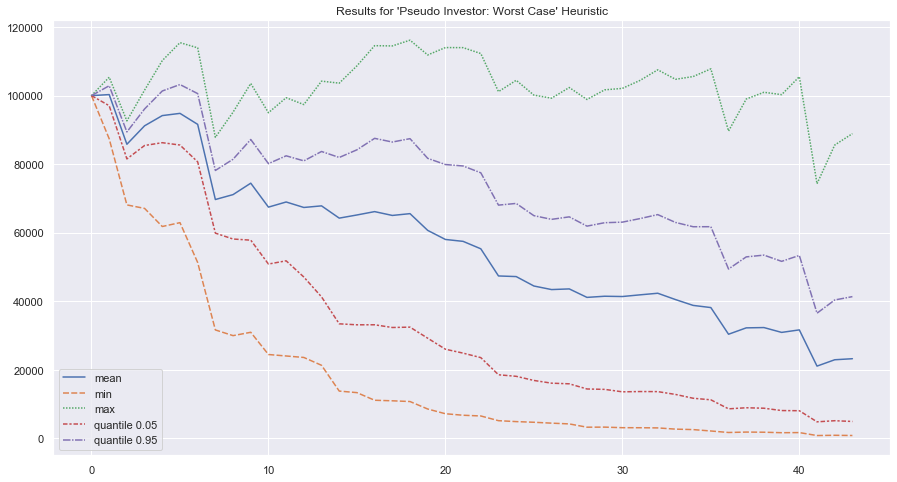

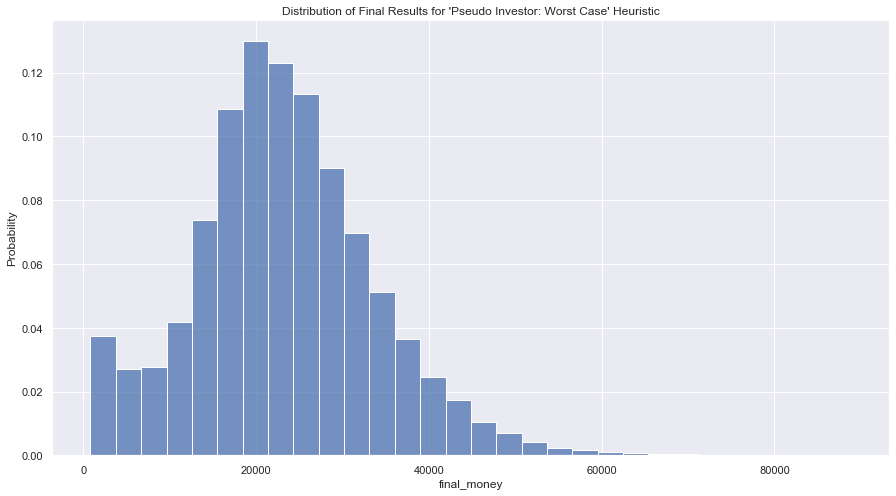

<Figure size 1080x576 with 0 Axes>

In [43]:
# Worst Investor
full_report_for_signel_heuristic(results_storage["WorstInvestor"])

Stats for Best Return in the previous quarter
{'biggest_bleed': -186794.66250738874, 'longest_bleed': 8, 'average_gain': 211961.08606393106, 'maximum_gain': 629355.185448966, 'minimum_gain': 38296.32220194397}


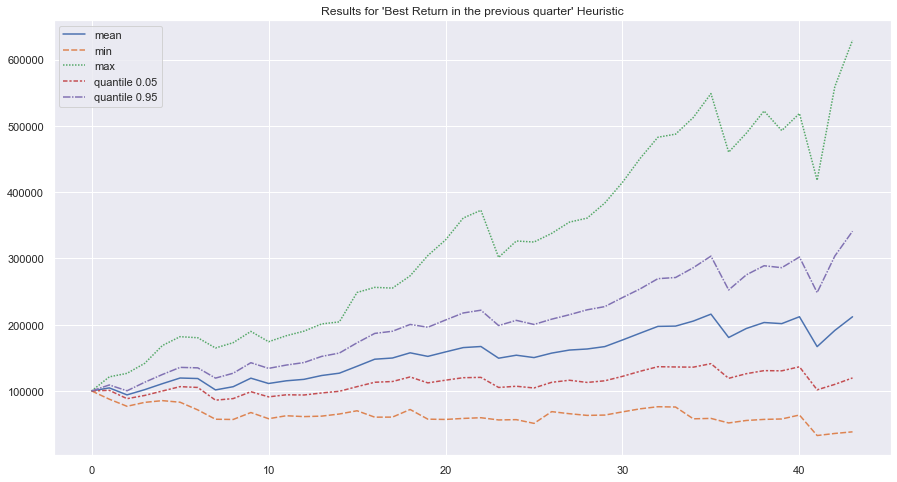

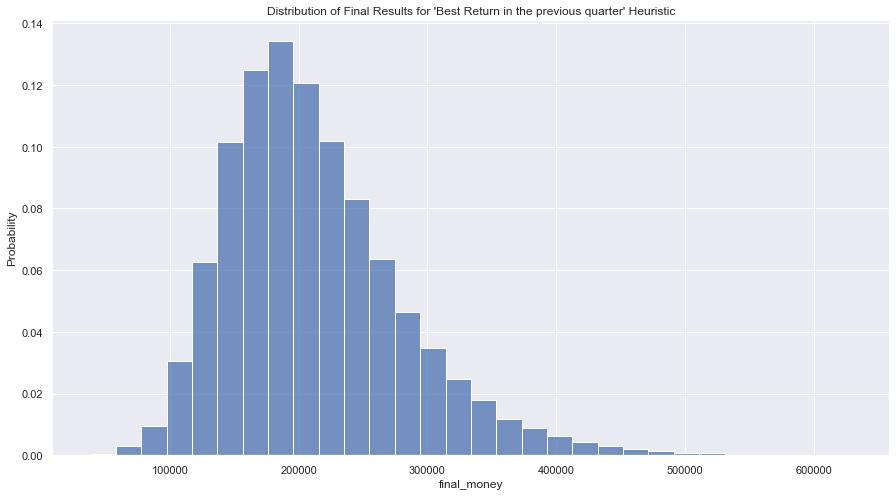

<Figure size 1080x576 with 0 Axes>

In [8]:
# Best Return: Last Quarter
full_report_for_signel_heuristic(results_storage["BestReturnLastQuarter"])

Stats for Best Return over the year
{'biggest_bleed': -175638.79700935498, 'longest_bleed': 8, 'average_gain': 238594.10367446835, 'maximum_gain': 858451.6694284105, 'minimum_gain': 49833.5130546037}


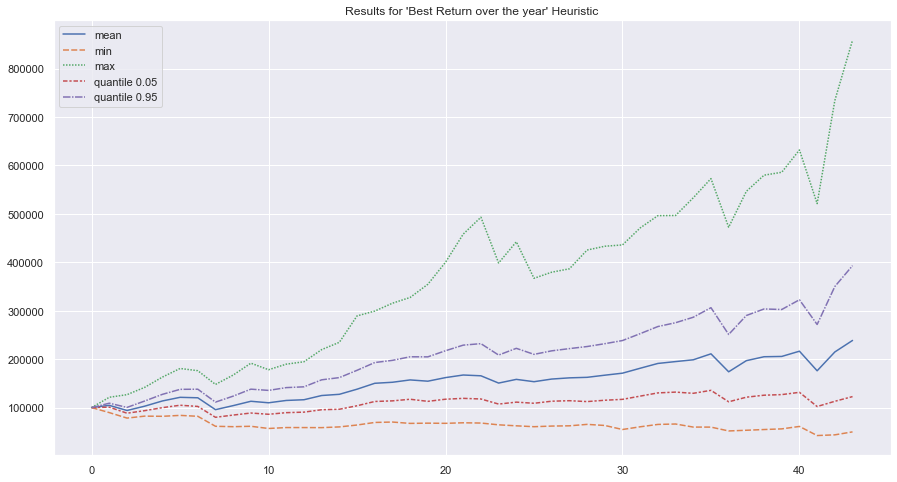

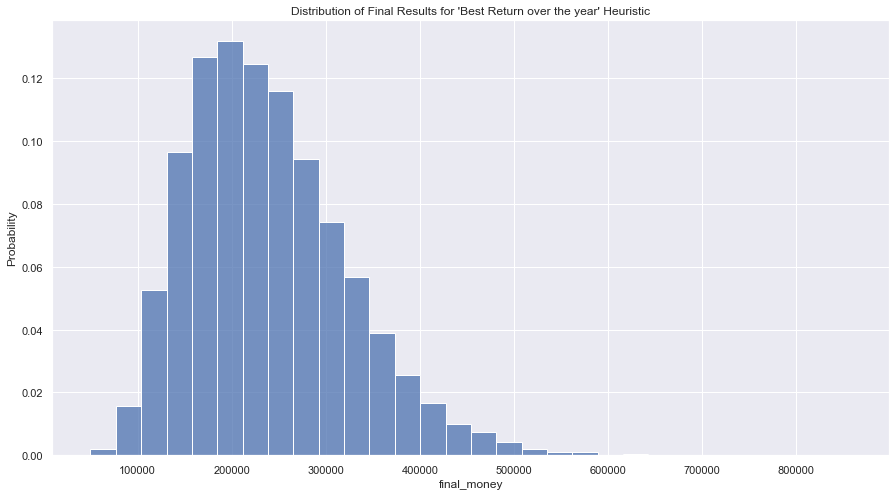

<Figure size 1080x576 with 0 Axes>

In [9]:
# Best Return: Last Year
full_report_for_signel_heuristic(results_storage["BestReturnLastYear"])

Stats for Best Return over the last three years
{'biggest_bleed': -162656.22998128383, 'longest_bleed': 8, 'average_gain': 300016.6688523667, 'maximum_gain': 906949.313272471, 'minimum_gain': 66188.38277936677}


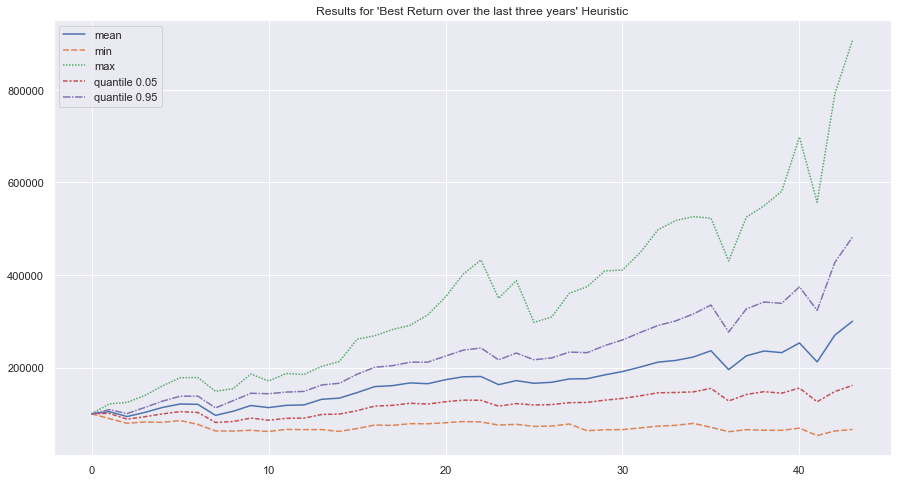

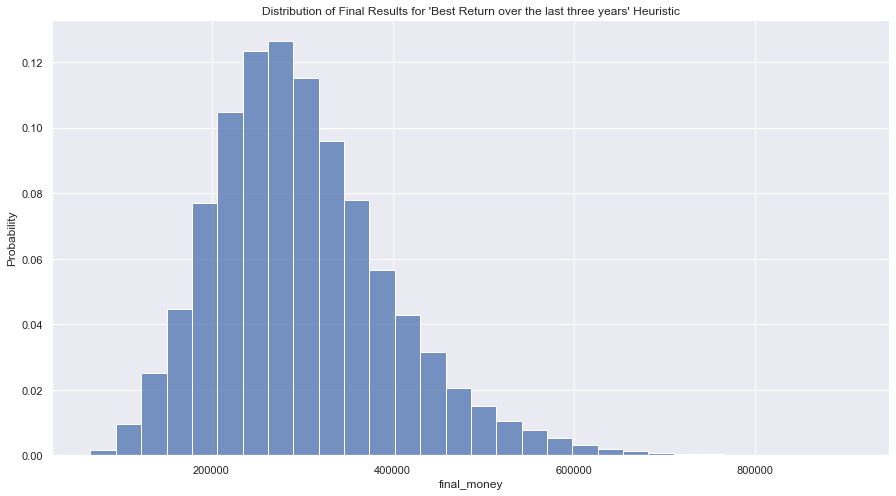

<Figure size 1080x576 with 0 Axes>

In [10]:
# Best Return: Last 3 Years
full_report_for_signel_heuristic(results_storage["BestReturnThreeYears"])

Stats for Best Return over the last five years
{'biggest_bleed': -146513.6501408819, 'longest_bleed': 9, 'average_gain': 307146.42810989544, 'maximum_gain': 833863.5164808165, 'minimum_gain': 82825.02036295731}


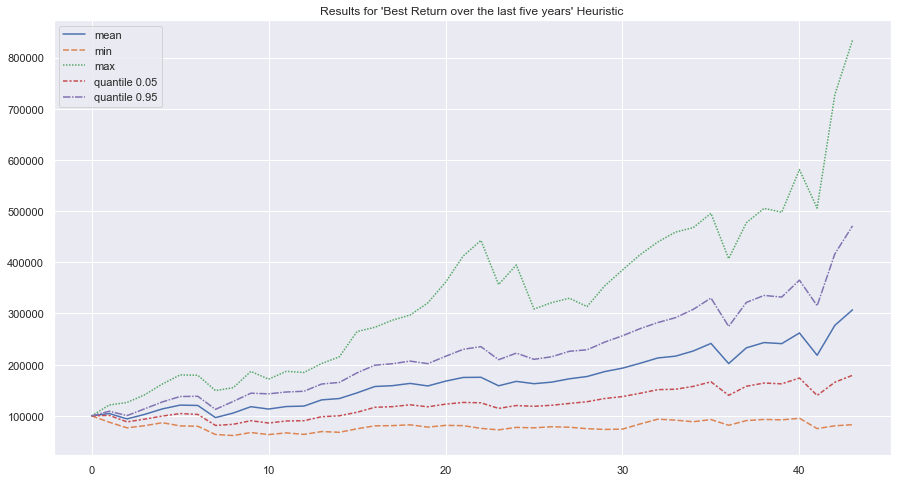

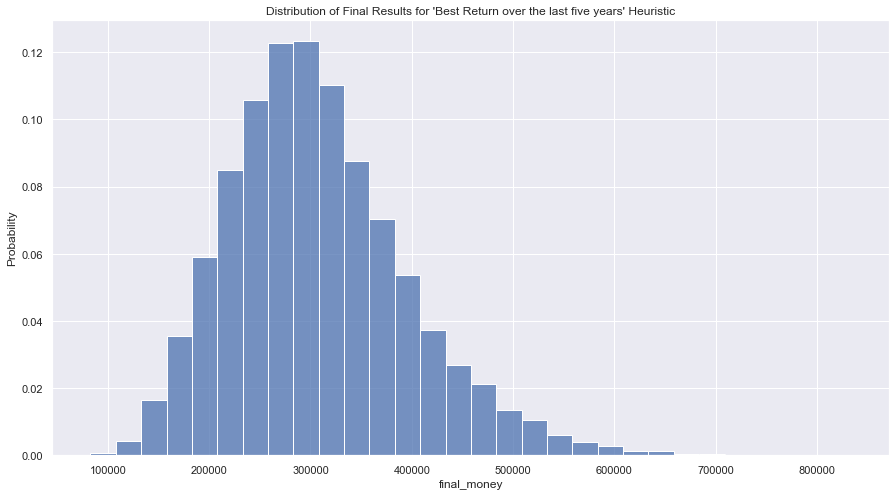

<Figure size 1080x576 with 0 Axes>

In [11]:
# Best Return: Last 5 Years
full_report_for_signel_heuristic(results_storage["BestReturnFiveYears"])

Stats for Sectorial Agent: Technology
{'biggest_bleed': -127557.19876421939, 'longest_bleed': 9, 'average_gain': 350444.8290929051, 'maximum_gain': 876222.1788987521, 'minimum_gain': 45446.63424253497}


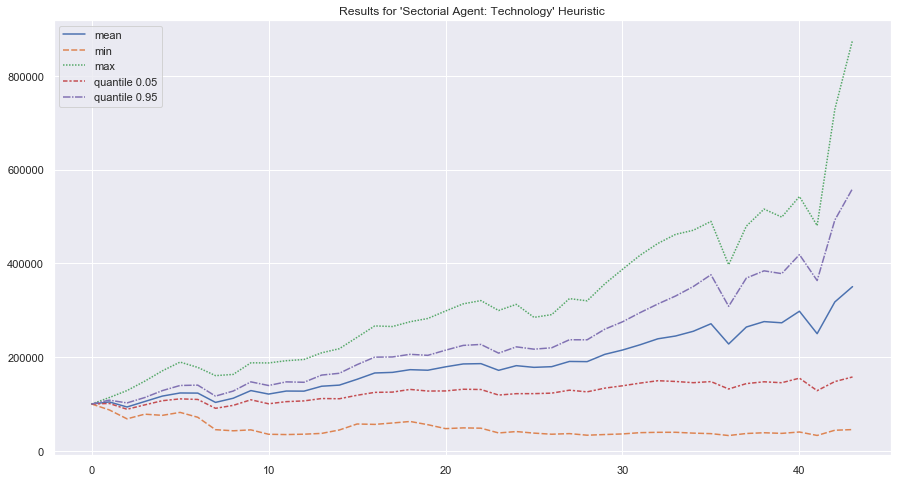

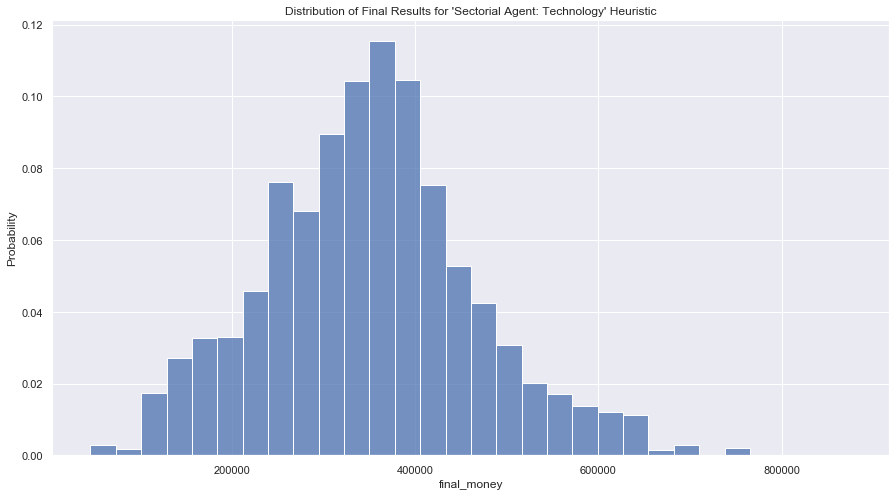

<Figure size 1080x576 with 0 Axes>

In [12]:
# Sectorial: Technology
full_report_for_signel_heuristic(results_storage["Technology"])

Stats for Sectorial Agent: Real Estate
{'biggest_bleed': -157964.895302137, 'longest_bleed': 7, 'average_gain': 201815.28280952893, 'maximum_gain': 703296.8496002171, 'minimum_gain': 39874.5867035227}


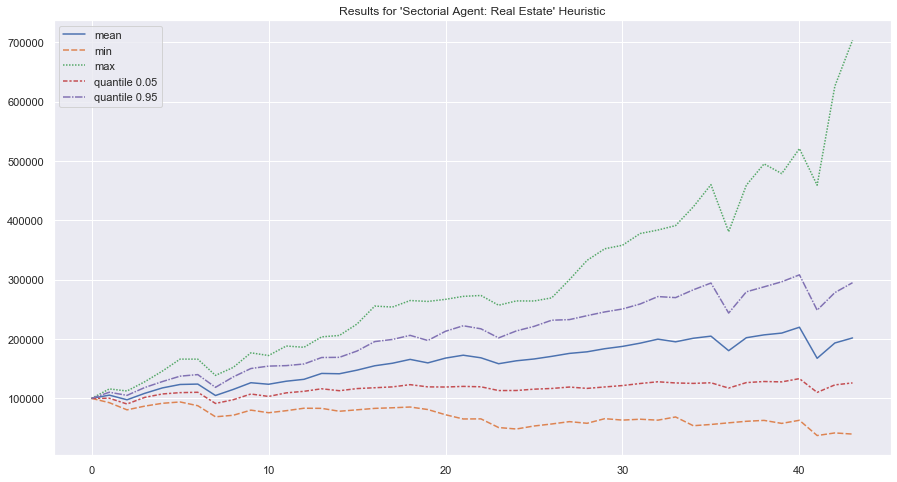

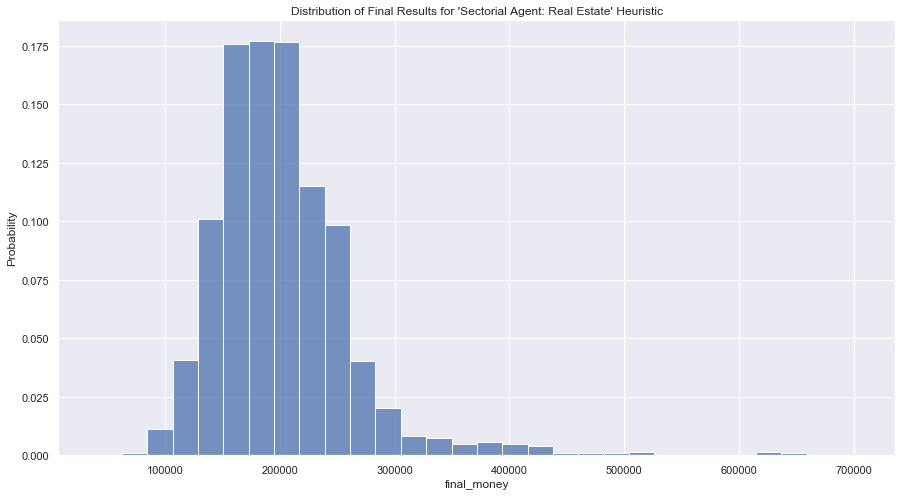

<Figure size 1080x576 with 0 Axes>

In [13]:
# Sectorial: Real Estate
full_report_for_signel_heuristic(results_storage["RealEstate"])

Stats for Pseudo Investor: Monkey (choosing random fund)
{'biggest_bleed': -232945.75512348546, 'longest_bleed': 10, 'average_gain': 223049.7783291832, 'maximum_gain': 680244.8267279078, 'minimum_gain': 44699.287708557735}


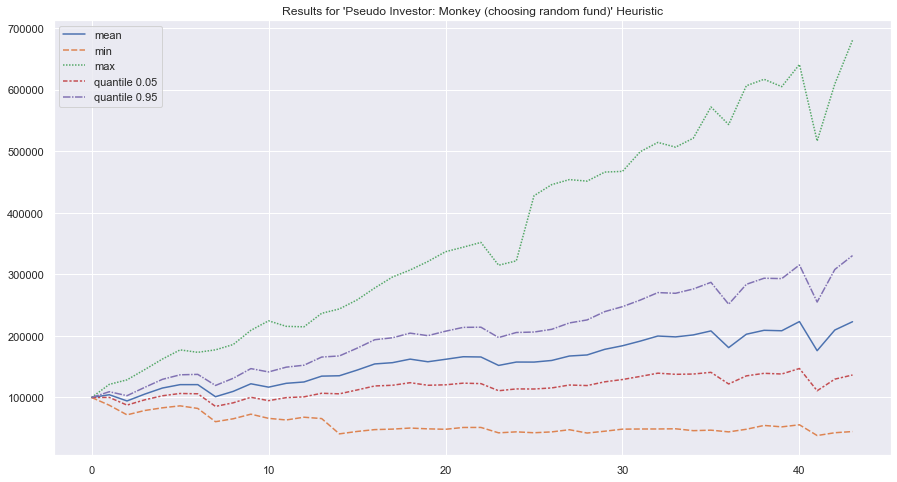

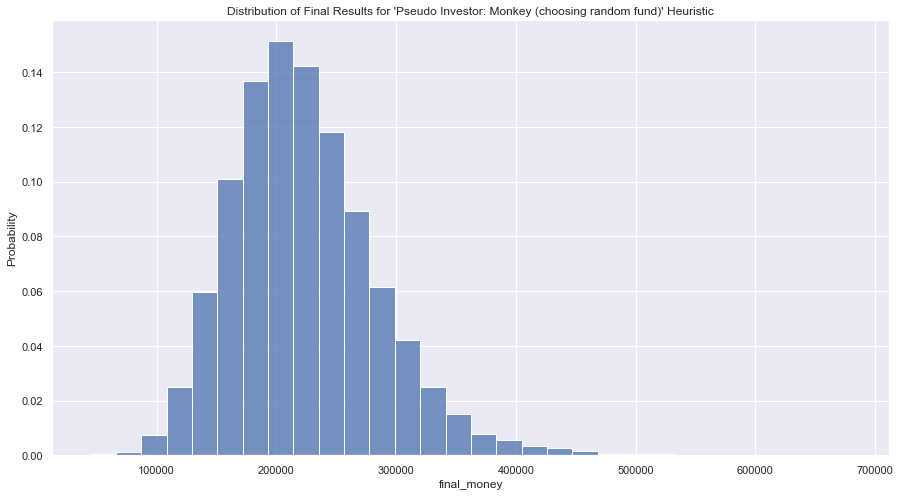

<Figure size 1080x576 with 0 Axes>

In [7]:
# Sectorial: Random Investor ("Monkey")
full_report_for_signel_heuristic(results_storage["RandomInvestor"])